### Q2) Random Forest (10 Marks)

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

In this assignment you will be trying to predict which user is going to buy a product displayed on a social media ad using the Random Forest classification method. You are free to use any library you want, though I will recommend checking this out: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


You will be using temps.csv dataset.

<strong>Note: You are required to submit the html files of both Q1 and Q2. Format should be q2_firsname_lastname_rollno.html</strong>


### Loading the dataset

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
dataset = pd.read_csv('temps.csv')
dataset.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


### Preprocessing

In [62]:
## Load the dataset into two variables for features and labels.
dataset['week'] = dataset['week'].replace(['Sun','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'],[1,2,3,4,5,6,7])
dataset['friend_Pred'] = np.where(dataset['friend']>=60, 1, 0)
X = dataset.drop(columns=['friend', 'year', 'friend_Pred'])
y = dataset['friend_Pred']
print(dataset.head())

   year  month  day  week  temp_2  temp_1  average  actual  friend  \
0  2019      1    1     6      45      45     45.6      45      29   
1  2019      1    2     7      44      45     45.7      44      61   
2  2019      1    3     1      45      44     45.8      41      56   
3  2019      1    4     2      44      41     45.9      40      53   
4  2019      1    5     3      41      40     46.0      44      41   

   friend_Pred  
0            0  
1            1  
2            0  
3            0  
4            0  


In [63]:
## You are then required to split the dataset; 70 percent into training and 30 percent into testing. 
## This can be easily done by using the train_test_split function from the sklearn library.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
## Standardize the independent features in the data using feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

### Model training & evaluation

In [65]:
## Fit the Random Forest Classification to the Training set
## Use 10 estimators
randomf = RandomForestClassifier(n_estimators=10)
randomf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [66]:
## Predict the Test set results
y_pred = randomf.predict(X_test)
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


Mean Square Error for Training Set: 0.01646090534979424
Mean Square Error for Test Set: 0.3142857142857143
Predition accuracy for Training Set: 0.9835390946502057
Predition accuracy for Test Set: 0.6857142857142857


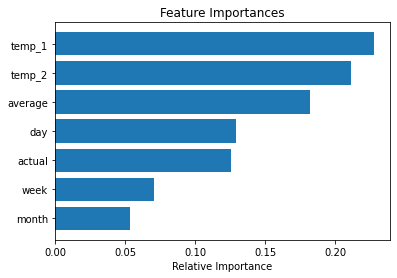

In [67]:
## Calculate accuracy & make the confusion matrix
## Display the confusion matrix as a heatmap as well
randomf_train_error = mean_squared_error(y_train, randomf.predict(X_train))
randomf_test_error = mean_squared_error(y_test, randomf.predict(X_test))
randomf_train_accuracy = accuracy_score(y_train,randomf.predict(X_train))
randomf_test_accuracy = accuracy_score(y_test,randomf.predict(X_test))

print('Mean Square Error for Training Set:', randomf_train_error)
print('Mean Square Error for Test Set:', randomf_test_error)
print('Predition accuracy for Training Set:', randomf_train_accuracy)
print('Predition accuracy for Test Set:',randomf_test_accuracy)

importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


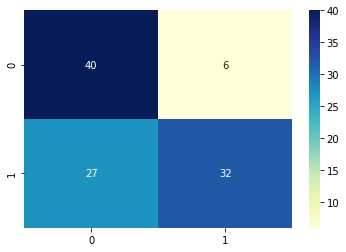

In [68]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap="YlGnBu")
plt.show()

### How does the score of the classifier change as you change the number of estimators? 

In [69]:
## Convert this into a markdown and type your answer here

Yes. By lowering number of etimators, I am getting low accuracy scores. But the difference is not much significant.